# Gabriel Freitas Willig
# RA: 2240289

## ICSI31 - Exercicío 2

### 1 - Visualize a rede “GraphMissingEdges.gml” (referente ao desafio no Kaggle) com o layout ForceAtlas2.

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from os import path
graph_path = path.abspath(path.join(path.dirname(__file__), "..", "GraphMissingEdges.gml"))

In [ ]:
G = nx.read_gml(graph_path)

In [30]:
pos = nx.forceatlas2_layout(
    G,
    pos=None,
    max_iter=200,           
    jitter_tolerance=1.0,
    scaling_ratio=2.0,
    gravity=1.0,
    distributed_action=False,
    strong_gravity=False,
    weight=None,            
    dissuade_hubs=False,
    linlog=False,
    seed=42
)

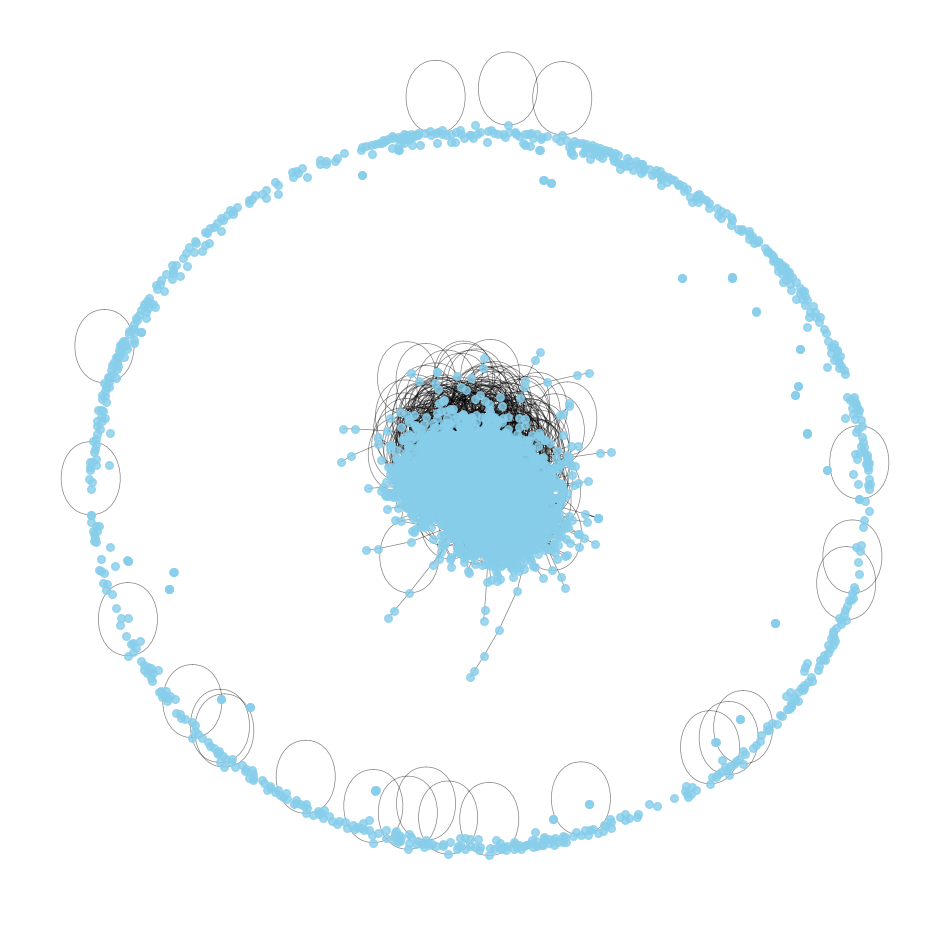

In [31]:
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=30, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.5)
plt.axis("off")
plt.show()

#### Grafo com ForceAtlas2 gerado pelo Gephi
![image](MissingEdgesFA.png)

### 2- Crie uma rede aleatória Erdos-Renyi com N=3000 e com probabilidade p=10-3 de dois nós aleatórios se conectarem.

In [32]:
N = 3000
p = 10**-3
H = nx.erdos_renyi_graph(N, p)

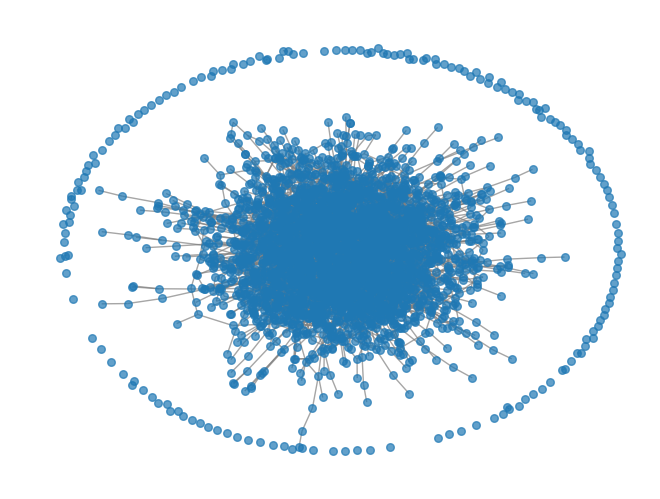

In [36]:
nx.draw(H, with_labels=False, node_size=30, edge_color="gray", alpha=0.7)

#### a) Qual o número de links esperado? Isso vai de acordo com o que foi observado na rede criada?

O número esperado de arestas é dado por 
$$
\langle L \rangle = p \cdot \frac{N (N - 1)}{2}
$$
Logo:
$$
\langle L \rangle = 10^{-3} \cdot \frac{3000 (3000 - 1)}{2}
$$
$$
\langle L \rangle = 4498.5
$$

O valor obtido com a rede criada foi de 4397, que esta dentro de uma margem de erro aceitável.

In [ ]:
print(H.number_of_edges()) # 4397

4357


#### b) Em qual regime essa rede se encontra, subcritical, critical, supercritical ou conected?
$$
\langle k \rangle = p \cdot (N - 1)
$$
$$
\langle k \rangle = 2.999
$$
Como $1 < \langle k \rangle < 8$ (ln(3000)) o grafo é `supercritical`

#### c) Visualize essa rede criada com o layout ForceAtlas2

In [38]:
pos2 = nx.forceatlas2_layout(
    H,
    pos=None,
    max_iter=200,
    jitter_tolerance=1.0,
    scaling_ratio=2.0,
    gravity=1.0,
    distributed_action=False,
    strong_gravity=False,
    weight=None,
    dissuade_hubs=False,
    linlog=False,
    seed=42
)

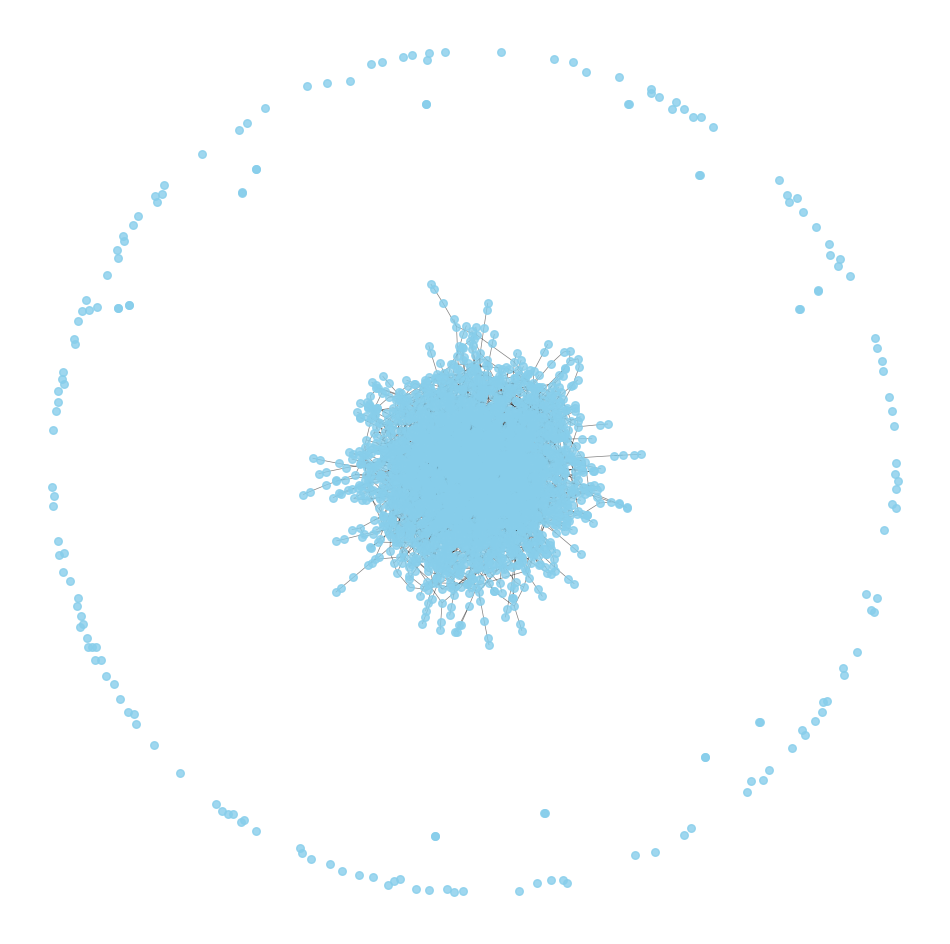

In [40]:
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(H, pos2, node_size=30, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(H, pos2, alpha=0.5, width=0.5)
plt.axis("off")
plt.show()

Ambos os grafos possuem um componente gigante no centro, assim como vários nós espalhados no formato de um anel.  
Apesar da dificuldade é possível notar a existência de hubs, nós com grau alto, conetados a muito outros nós, eles estão mais ao centro.  
A componente gigante ao centro no primeiro caso parece mais próxima aos nós externos do que o segundo grafo.

### 3- Com base na rede fornecida para o desafio, arquivo “GraphMissingEdges.gml”, faça:
#### a) Compute a distribuição de graus.

In [41]:
degrees = [d for n, d in G.degree()]

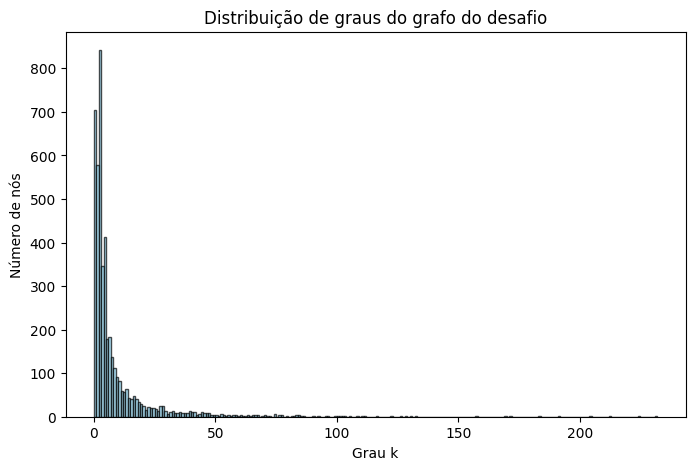

In [42]:
plt.figure(figsize=(8,5))
plt.hist(degrees, bins=range(min(degrees), max(degrees)+1), color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Distribuição de graus do grafo do desafio")
plt.xlabel("Grau k")
plt.ylabel("Número de nós")
plt.show()

#### b) Compute a distribuição de graus para duas redes aleatórias com o mesmo número de nós e não direcionadas, mas uma com p=0,001 e outra com p =0,01.

In [43]:
N = G.number_of_nodes()

# Rede aleatória com p=0.001
G1 = nx.erdos_renyi_graph(N, 0.001)
# Rede aleatória com p=0.01
G2 = nx.erdos_renyi_graph(N, 0.01)

In [44]:
deg1 = [d for n, d in G1.degree()]
deg2 = [d for n, d in G2.degree()]

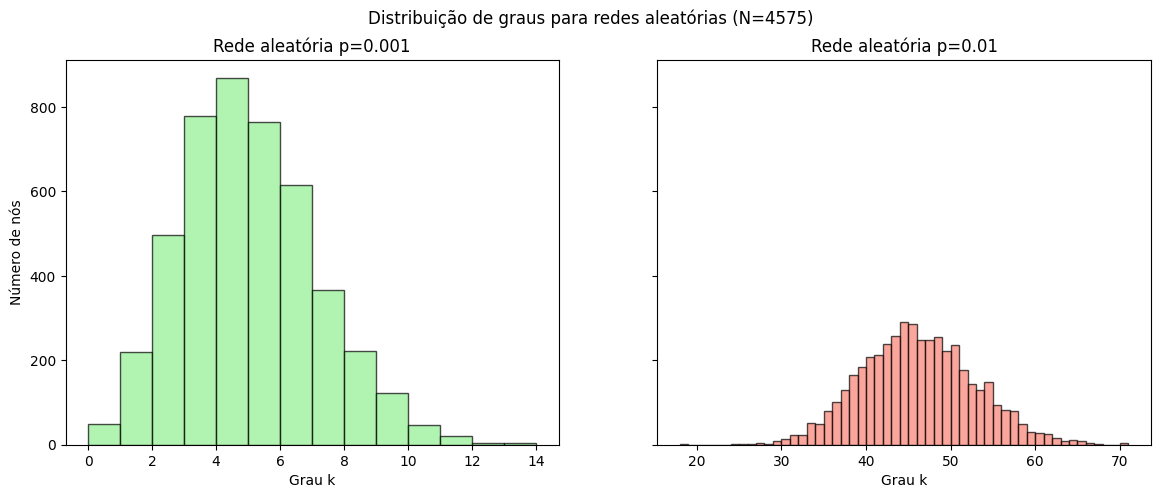

In [45]:
fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True)

axes[0].hist(deg1, bins=range(min(deg1), max(deg1)+1), color='lightgreen', alpha=0.7, edgecolor='black')
axes[0].set_title("Rede aleatória p=0.001")
axes[0].set_xlabel("Grau k")
axes[0].set_ylabel("Número de nós")

axes[1].hist(deg2, bins=range(min(deg2), max(deg2)+1), color='salmon', alpha=0.7, edgecolor='black')
axes[1].set_title("Rede aleatória p=0.01")
axes[1].set_xlabel("Grau k")

plt.suptitle(f"Distribuição de graus para redes aleatórias (N={N})")
plt.show()

#### c) A rede do desafio possui características de redes aleatórias? Justifique a sua resposta
Com base no histograma, alguns poucos nós possuem grau muito alto, o que não é esperado em uma rede aleatória onde a distribuição de graus tende a ser mais homogênea.  
Isso sugere que a rede original pode ter uma estrutura mais complexa ou a presença de nós com alta conectividade (hubs).  
Vemos uma grande componente central densa com muitos nós interconectados.  
Há também muitos nós isolados espalhados ao redor.  
Não parece ser um caso de rede aleatória, que tende a ter uma distribuição de graus mais homogênea e menos hubs.  